In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_csv('stroke_zaj3.csv', sep=';', decimal = ',', header = 0)
df2 = pd.read_csv('stroke_zaj1.csv',  sep=';', decimal = ',', header = 0)

print(f"Comparison df1 vs df2 - row numbers: {len(df1)} vs {len(df2)}")
print(f"columns number: {len(df1.columns)} vs {len(df2.columns)}")

# === 2. Comparison of data columns names
kolumny1 = set(df1.columns)
kolumny2 = set(df2.columns)

print("\nonly file 1 columns")
print(kolumny1 - kolumny2)
print("\n--- Kolumny tylko w pliku 2 ---")
print(kolumny2 - kolumny1)

# Common columns
common = list(kolumny1 & kolumny2)
print(f"\nCommon columns: {len(common)}")

#3. Statistics for numeric columns
num_cols = [c for c in common if np.issubdtype(df1[c].dtype, np.number)]


stat_df = pd.DataFrame({
        'Mean_file1': df1[num_cols].mean(),
        'Mean_file2': df2[num_cols].mean(),
        'Median_file1': df1[num_cols].median(),
        'Median_file2': df2[num_cols].median(),
        'std_file1': df1[num_cols].std(),
        'std_file2': df2[num_cols].std(),
    })
print(stat_df)


# === 4. Proportion comparison for categoric columns
cat_cols = [c for c in common if not np.issubdtype(df1[c].dtype, np.number)]

for col in cat_cols:
    print(f"\nColumn: {col}")
    prop1 = df1[col].value_counts(normalize=True)
    prop2 = df2[col].value_counts(normalize=True)
    comparison = pd.concat([prop1, prop2], axis=1, keys=['file1', 'file2']).fillna(0)
    comparison['difference'] = (comparison['file1'] - comparison['file2']).abs()
    print(comparison.head(10))  # top 10 categories

Comparison df1 vs df2 - row numbers: 612 vs 612
columns number: 11 vs 11

only file 1 columns
set()

--- Kolumny tylko w pliku 2 ---
set()

Common columns: 11
                   Mean_file1  Mean_file2  Median_file1  Median_file2  \
avg_glucose_level  116.383268  116.235352        95.925        95.925   
bmi                 30.302941   30.420036        29.050        29.300   
heart_disease        0.096405    0.096405         0.000         0.000   
hypertension         0.158497    0.158497         0.000         0.000   
stroke               0.341503    0.341503         0.000         0.000   
age                 52.632353   52.632353        54.000        54.000   

                   std_file1  std_file2  
avg_glucose_level  53.487380  53.497575  
bmi                 7.040225   7.044442  
heart_disease       0.295388   0.295388  
hypertension        0.365505   0.365505  
stroke              0.474602   0.474602  
age                20.709916  20.709916  

Column: work_type
                

In [44]:
cols = ['hypertension', 'heart_disease', 'ever_married', 
        'work_type', 'Residence_type', 'smoking_status', 'stroke']

for col in cols:
    print(f"{col}: {df1[col].unique()}")

hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


In [45]:
df1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,52.632353,0.158497,0.096405,116.383268,30.302941,0.341503
std,20.709916,0.365505,0.295388,53.487380,7.040225,0.474602
min,5.000000,0.000000,0.000000,55.390000,14.600000,0.000000
25%,39.000000,0.000000,0.000000,78.695000,25.575000,0.000000
50%,54.000000,0.000000,0.000000,95.925000,29.050000,0.000000
75%,70.000000,0.000000,0.000000,130.120000,34.125000,1.000000
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.000000


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             612 non-null    object 
 1   age                612 non-null    int64  
 2   hypertension       612 non-null    int64  
 3   heart_disease      612 non-null    int64  
 4   ever_married       612 non-null    object 
 5   work_type          612 non-null    object 
 6   Residence_type     612 non-null    object 
 7   avg_glucose_level  612 non-null    float64
 8   bmi                612 non-null    float64
 9   smoking_status     612 non-null    object 
 10  stroke             612 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 52.7+ KB


In [47]:
missing = df1.isnull().sum()
missing = missing[missing > 0]
for col, count in missing.items():
    print(f"{col}: {count} missing values")
print(df1.shape[0]) #rows number

612


No missing data. The data are very similar to those from task 1, as indicated by the same descriptive statistics – medians, means, and minima. Additionally, a quick exploratory data analysis (EDA) was carried out – both graphical and to compare the distribution of the dependent variable.

In [48]:
def plot_distribution(df, col, kind='hist', bins=20, label=None, color='steelblue'):
    plt.figure(figsize=(10, 5))
    
    if label is None:
        label = col
    
    if kind == 'hist':
        sns.histplot(df[col].dropna(), color=color, label=label, 
                     kde=False, bins=bins, alpha=0.7)
    elif kind == 'kde':
        sns.kdeplot(df[col].dropna(), color=color, label=label, linewidth=2)
    elif kind == 'both':
        sns.histplot(df[col].dropna(), color=color, label=label, 
                     kde=True, bins=bins, alpha=0.6)
    else:
        raise ValueError("kind must be 'hist', 'kde' or 'both'")
    
    plt.title(f'Distribution of the variable: {label}')
    plt.xlabel('Value')
    plt.ylabel('Number of occurences' if kind in ['hist', 'both'] else 'Density')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_categorical(df, col, label=None, figsize=(10, 6), color='steelblue'):
    
    if label is None:
        label = col
    
    counts = df[col].value_counts().sort_index()
    
    plt.figure(figsize=figsize)
    
    plt.bar(range(len(counts)), counts.values, color=color, alpha=0.7, edgecolor='black')
    plt.xticks(range(len(counts)), counts.index, rotation=45, ha='right')
    plt.title(f'Distribution of the variable: {label}', fontsize=14)
    plt.xlabel('Category')
    plt.ylabel('Number of the occurences')
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    
    print(f"\nStatistics for '{label}':")
    print(counts)
    print(f"\nTogether: {counts.sum()} values")
    print(f"Number of unique categories: {len(counts)}")

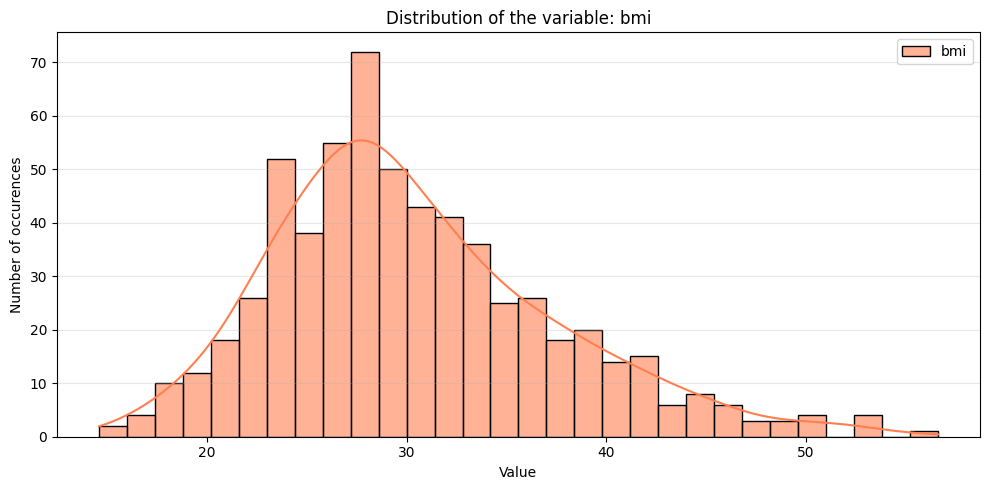

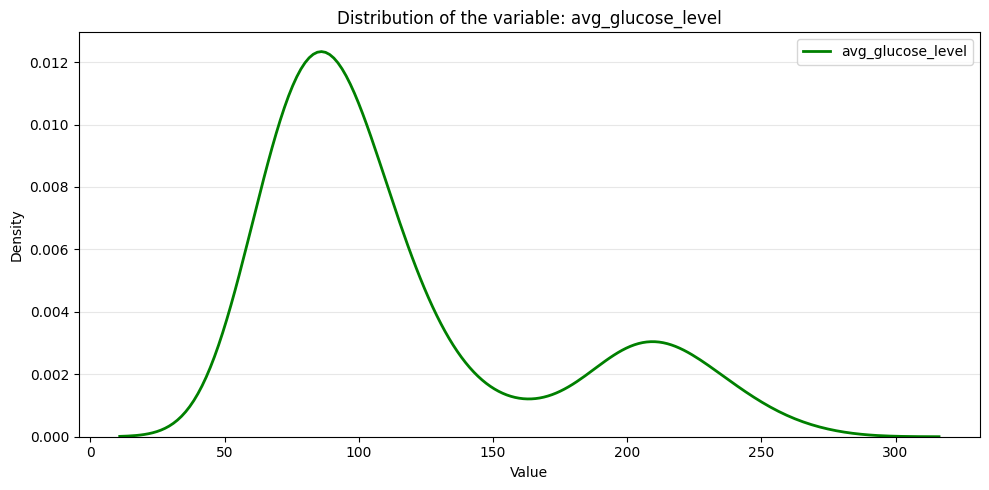

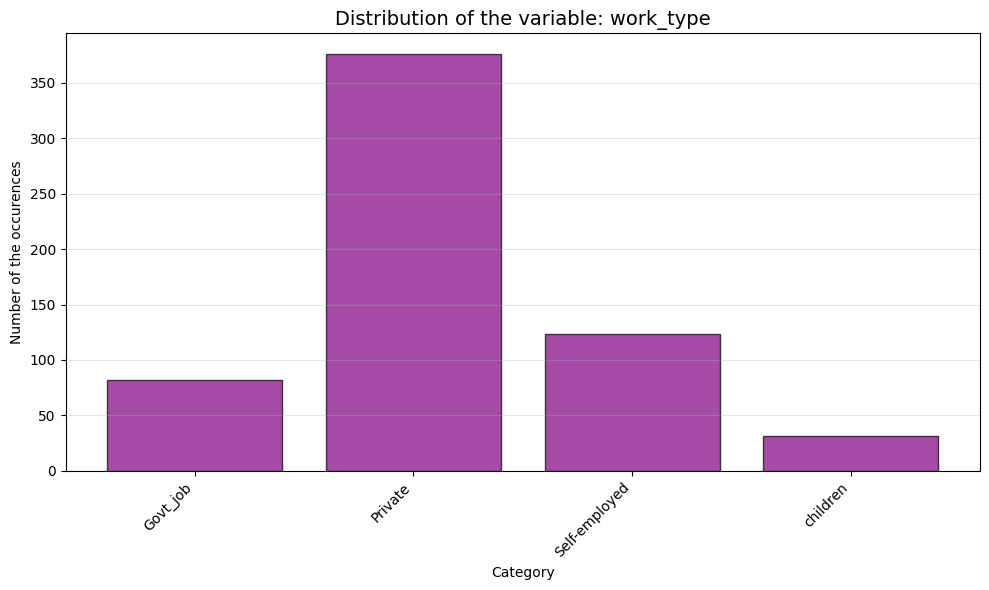


Statistics for 'work_type':
work_type
Govt_job          82
Private          376
Self-employed    123
children          31
Name: count, dtype: int64

Together: 612 values
Number of unique categories: 4


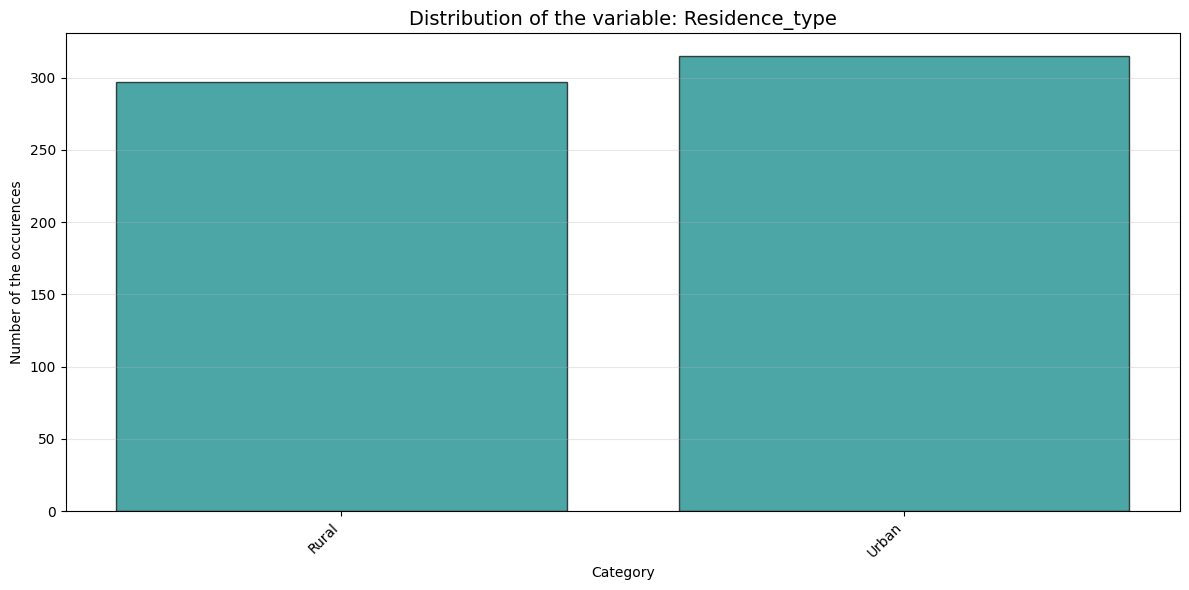


Statistics for 'Residence_type':
Residence_type
Rural    297
Urban    315
Name: count, dtype: int64

Together: 612 values
Number of unique categories: 2


In [49]:
plot_distribution(df1, 'bmi', kind='both', bins=30, color='coral')
plot_distribution(df1, 'avg_glucose_level', kind='kde', color='green')

#for categorical variables
plot_categorical(df1, 'work_type', color='purple')
plot_categorical(df1, 'Residence_type', figsize=(12, 6), color='teal')

TABLES - Categoric variables vs STROKE

gender vs stroke:
stroke    0    1  All
gender               
Female  235  120  355
Male    168   89  257
All     403  209  612

hypertension vs stroke:
stroke          0    1  All
hypertension               
0             366  149  515
1              37   60   97
All           403  209  612

heart_disease vs stroke:
stroke           0    1  All
heart_disease               
0              384  169  553
1               19   40   59
All            403  209  612

ever_married vs stroke:
stroke          0    1  All
ever_married               
No            109   23  132
Yes           294  186  480
All           403  209  612

work_type vs stroke:
stroke           0    1  All
work_type                   
Govt_job        54   28   82
Private        249  127  376
Self-employed   70   53  123
children        30    1   31
All            403  209  612

Residence_type vs stroke:
stroke            0    1  All
Residence_type               
Rural           197

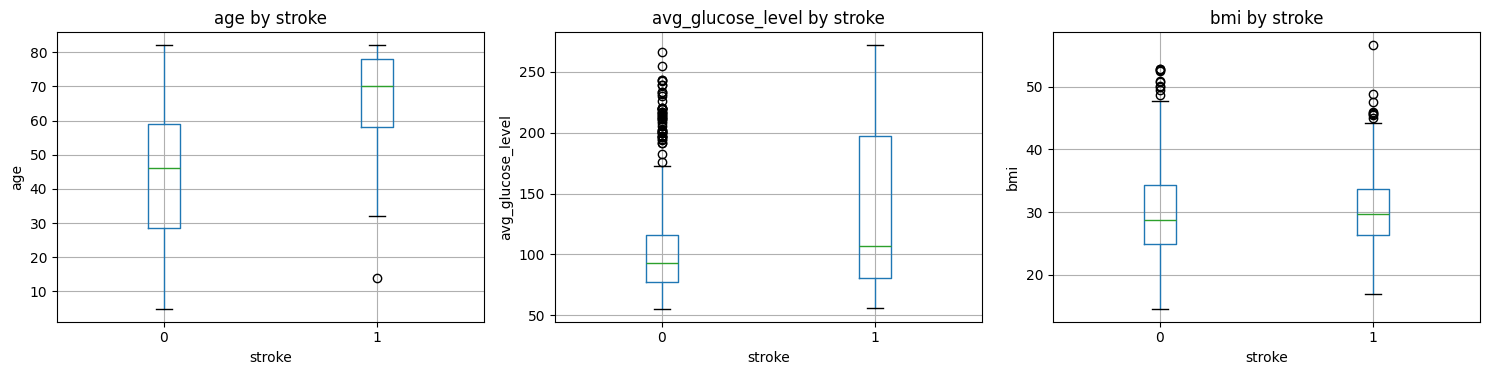

In [50]:

print("TABLES - Categoric variables vs STROKE")

categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                        'work_type', 'Residence_type', 'smoking_status']

for var in categorical_features:
    print(f"\n{var} vs stroke:")
    print(pd.crosstab(df1[var], df1['stroke'], margins=True))
    

#plots for numeric cols vs stroke
numeric_vars = ['age', 'avg_glucose_level', 'bmi']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, var in enumerate(numeric_vars):
    df1.boxplot(column=var, by='stroke', ax=axes[idx])
    axes[idx].set_title(f'{var} by stroke')
    axes[idx].set_xlabel('stroke')
    axes[idx].set_ylabel(var)

plt.suptitle('')  
plt.tight_layout()
plt.show()

In [51]:
stroke_counts = df1['stroke'].value_counts()
stroke_pct = df1['stroke'].value_counts(normalize=True) * 100

print("\nNumbers:")
print(stroke_counts)
print("\nPercentages:")
print(stroke_pct)
print(f"\nStroke = 0: {stroke_pct[0]:.2f}%")
print(f"Stroke = 1: {stroke_pct[1]:.2f}%")


Numbers:
stroke
0    403
1    209
Name: count, dtype: int64

Percentages:
stroke
0    65.849673
1    34.150327
Name: proportion, dtype: float64

Stroke = 0: 65.85%
Stroke = 1: 34.15%


The dependent variable is balanced. Now the data are being prepared for modeling with a decision tree. This is done through one-hot encoding for categorical variables, while no standardization is applied to numerical variables, as it is not necessary.

In [52]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score, 
                             roc_curve, make_scorer)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


feature_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 
                'work_type', 'Residence_type', 'avg_glucose_level', 
                'bmi', 'smoking_status']

numeric_cols = ['age', 'hypertension', 'heart_disease', 
                'avg_glucose_level', 'bmi']

# Categoric variables to one-hot encoding
categorical_cols = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status']

X_numeric = df1[numeric_cols]
X_categorical = pd.get_dummies(df1[categorical_cols], drop_first=True)

X = pd.concat([X_numeric, X_categorical], axis=1)
y = df1['stroke']


#division - 80-20 train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"Train set: {X_train.shape[0]} observations")
print(f"Test set: {X_test.shape[0]} observations")
print(f"\nDistribution stroke in train set:")
print(y_train.value_counts(normalize=True) * 100)
print(f"\Distribution stroke in test set:")
print(y_test.value_counts(normalize=True) * 100)

Train set: 489 observations
Test set: 123 observations

Distribution stroke in train set:
stroke
0    65.848671
1    34.151329
Name: proportion, dtype: float64
\Distribution stroke in test set:
stroke
0    65.853659
1    34.146341
Name: proportion, dtype: float64


In [53]:
def specificity_score(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=0)


specificity_scorer = make_scorer(specificity_score)


def evaluate_model_train_only(model, X_train, y_train, model_name="Model", cv=5):
    
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_sensitivity = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    cv_specificity = cross_val_score(model, X_train, y_train, cv=cv, scoring=specificity_scorer)
    cv_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    
    train_metrics = {
        'accuracy': accuracy_score(y_train, y_train_pred),
        'sensitivity': recall_score(y_train, y_train_pred),
        'specificity': recall_score(y_train, y_train_pred, pos_label=0),
        'precision': precision_score(y_train, y_train_pred),
        'f1': f1_score(y_train, y_train_pred),
        'auc': roc_auc_score(y_train, y_train_proba)
    }
    
    cv_metrics = {
        'cv_accuracy_mean': cv_accuracy.mean(),
        'cv_accuracy_std': cv_accuracy.std(),
        'cv_sensitivity_mean': cv_sensitivity.mean(),
        'cv_sensitivity_std': cv_sensitivity.std(),
        'cv_specificity_mean': cv_specificity.mean(),
        'cv_specificity_std': cv_specificity.std(),
        'cv_auc_mean': cv_auc.mean(),
        'cv_auc_std': cv_auc.std()
    }
    
    print(f"\n{'='*70}")
    print(f"{model_name}")
    print(f"{'='*70}")
    print(f"\n{'Metric':<20} {'Whole set':<15} {'CV Mean':<15} {'CV Std':<10}")
    print(f"{'-'*70}")
    print(f"{'Accuracy':<20} {train_metrics['accuracy']:<15.4f} "
          f"{cv_metrics['cv_accuracy_mean']:<15.4f} {cv_metrics['cv_accuracy_std']:<10.4f}")
    print(f"{'Sensitivity (RECALL)':<20} {train_metrics['sensitivity']:<15.4f} "
          f"{cv_metrics['cv_sensitivity_mean']:<15.4f} {cv_metrics['cv_sensitivity_std']:<10.4f}")
    print(f"{'Specificity':<20} {train_metrics['specificity']:<15.4f} "
          f"{cv_metrics['cv_specificity_mean']:<15.4f} {cv_metrics['cv_specificity_std']:<10.4f}")
    print(f"{'Precision':<20} {train_metrics['precision']:<15.4f} "
          f"{'N/A':<15} {'N/A':<10}")
    print(f"{'F1-Score':<20} {train_metrics['f1']:<15.4f} "
          f"{'N/A':<15} {'N/A':<10}")
    print(f"{'AUC':<20} {train_metrics['auc']:<15.4f} "
          f"{cv_metrics['cv_auc_mean']:<15.4f} {cv_metrics['cv_auc_std']:<10.4f}")
    
    return train_metrics, cv_metrics


def evaluate_final_model(model, X_test, y_test, model_name="Model Final"):
    
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    test_metrics = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'sensitivity': recall_score(y_test, y_test_pred),
        'specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'precision': precision_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred),
        'auc': roc_auc_score(y_test, y_test_proba)
    }
    
    print(f"\n{'='*70}")
    print(f"{model_name} - FINAL MARK OF TEST SET")
    print(f"{'='*70}")
    print(f"\n{'Metric':<20} {'Value':<15}")
    print(f"{'-'*40}")
    for metric, value in test_metrics.items():
        print(f"{metric.capitalize():<20} {value:<15.4f}")
    
    #Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
                xticklabels=['No Stroke', 'Stroke'],
                yticklabels=['No Stroke', 'Stroke'])
    plt.title(f'Confusion matrix - {model_name}')
    plt.ylabel('Real class')
    plt.xlabel('Predictive class')
    plt.tight_layout()
    plt.show()
    
    # Classification report
    print(f"\nDetailed Classification Report:")
    print(classification_report(y_test, y_test_pred, 
                               target_names=['No Stroke', 'Stroke']))
    
    return test_metrics, y_test_pred


def compare_tree_depths_train_only(X_train, y_train, max_depths=range(1, 21), cv=5):
    
    results = {
        'max_depth': [],
        'cv_accuracy_mean': [], 'cv_accuracy_std': [],
        'cv_sensitivity_mean': [], 'cv_sensitivity_std': [],
        'cv_specificity_mean': [], 'cv_specificity_std': [],
        'cv_auc_mean': [], 'cv_auc_std': [],
        'train_accuracy': [], 'train_sensitivity': [], 'train_specificity': [],
        'n_leaves': [], 'n_nodes': []
    }
    
    
    for depth in max_depths:
        # Training of the model
        tree = DecisionTreeClassifier(max_depth=depth, random_state=42, 
                                     min_samples_split=20, min_samples_leaf=10)
        tree.fit(X_train, y_train)
        
        # Predictions on train set
        y_train_pred = tree.predict(X_train)
        
        # K-cross validation
        cv_accuracy = cross_val_score(tree, X_train, y_train, cv=cv, scoring='accuracy')
        cv_sensitivity = cross_val_score(tree, X_train, y_train, cv=cv, scoring='recall')
        cv_specificity = cross_val_score(tree, X_train, y_train, cv=cv, scoring=specificity_scorer)
        cv_auc = cross_val_score(tree, X_train, y_train, cv=cv, scoring='roc_auc')
        
        #Saving results
        results['max_depth'].append(depth)
        results['cv_accuracy_mean'].append(cv_accuracy.mean())
        results['cv_accuracy_std'].append(cv_accuracy.std())
        results['cv_sensitivity_mean'].append(cv_sensitivity.mean())
        results['cv_sensitivity_std'].append(cv_sensitivity.std())
        results['cv_specificity_mean'].append(cv_specificity.mean())
        results['cv_specificity_std'].append(cv_specificity.std())
        results['cv_auc_mean'].append(cv_auc.mean())
        results['cv_auc_std'].append(cv_auc.std())
        results['train_accuracy'].append(accuracy_score(y_train, y_train_pred))
        results['train_sensitivity'].append(recall_score(y_train, y_train_pred))
        results['train_specificity'].append(recall_score(y_train, y_train_pred, pos_label=0))
        results['n_leaves'].append(tree.get_n_leaves())
        results['n_nodes'].append(tree.tree_.node_count)
        
        print(f"  Głębokość {depth}: CV Sensitivity = {cv_sensitivity.mean():.4f}")
    
    print("Analiza zakończona!")
    return pd.DataFrame(results)


def plot_depth_comparison_cv_only(results_df):

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Accuracy
    axes[0, 0].plot(results_df['max_depth'], results_df['cv_accuracy_mean'], 
                    's-', color='green', alpha=0.8, linewidth=2, label='CV Mean')
    axes[0, 0].fill_between(results_df['max_depth'],
                            results_df['cv_accuracy_mean'] - results_df['cv_accuracy_std'],
                            results_df['cv_accuracy_mean'] + results_df['cv_accuracy_std'],
                            alpha=0.2, color='green')
    axes[0, 0].set_title('Accuracy vs max_depth')
    axes[0, 0].set_xlabel('Max depth of the tree')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()

    #Sensitivity
    axes[0, 1].plot(results_df['max_depth'], results_df['cv_sensitivity_mean'], 
                    's-', color='red', alpha=0.8, linewidth=2, label='CV Mean')
    axes[0, 1].fill_between(results_df['max_depth'],
                            results_df['cv_sensitivity_mean'] - results_df['cv_sensitivity_std'],
                            results_df['cv_sensitivity_mean'] + results_df['cv_sensitivity_std'],
                            alpha=0.2, color='red')
    axes[0, 1].set_title('Sensitivity cs depth of the tree')
    axes[0, 1].set_xlabel('Max depth of the tree')
    axes[0, 1].set_ylabel('Sensitivity')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()

    # Specyficzność (Specificity)
    axes[1, 0].plot(results_df['max_depth'], results_df['cv_specificity_mean'], 
                    's-', color='orange', alpha=0.8, linewidth=2, label='CV Mean')
    axes[1, 0].fill_between(results_df['max_depth'],
                            results_df['cv_specificity_mean'] - results_df['cv_specificity_std'],
                            results_df['cv_specificity_mean'] + results_df['cv_specificity_std'],
                            alpha=0.2, color='orange')
    axes[1, 0].set_title('Specificity vs depth of the tree')
    axes[1, 0].set_xlabel('max depth of the tree')
    axes[1, 0].set_ylabel('Specificity')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()

    # AUC
    axes[1, 1].plot(results_df['max_depth'], results_df['cv_auc_mean'], 
                    's-', color='purple', alpha=0.8, linewidth=2, label='CV Mean')
    axes[1, 1].fill_between(results_df['max_depth'],
                            results_df['cv_auc_mean'] - results_df['cv_auc_std'],
                            results_df['cv_auc_mean'] + results_df['cv_auc_std'],
                            alpha=0.2, color='purple')
    axes[1, 1].set_title('AUC vs depth of the tree')
    axes[1, 1].set_xlabel('max depth of the tree')
    axes[1, 1].set_ylabel('AUC')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()



def plot_tree_structure(tree, X_train, max_depth_to_show=3):
    
    plt.figure(figsize=(20, 10))
    plot_tree(tree, 
              feature_names=X_train.columns,
              class_names=['No Stroke', 'Stroke'],
              filled=True,
              rounded=True,
              fontsize=10,
              max_depth=max_depth_to_show)
    plt.title(f'Structure of the decision tree (Shown {max_depth_to_show} levels)')
    plt.tight_layout()
    plt.show()


def analyze_feature_importance(tree, X_train, top_n=10):
    
    importances = pd.DataFrame({
        'feature': X_train.columns,
        'importance': tree.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importances.head(top_n), x='importance', y='feature', palette='viridis')
    plt.title(f'Top {top_n} the most important features')
    plt.xlabel('Importance of the feature')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    
    return importances

1. Comparison of max_depths parameter

In [54]:
results_df = compare_tree_depths_train_only(X_train, y_train, max_depths=range(2, 21), cv=5)

print("\n Table of the scores for different max_depths (Cross validation):")
print("\nWhole table:")
print(results_df[['max_depth', 'cv_sensitivity_mean', 'cv_sensitivity_std', 
                  'cv_specificity_mean', 'cv_accuracy_mean', 'cv_auc_mean', 
                  'n_leaves', 'n_nodes']].to_string(index=False))

  Głębokość 2: CV Sensitivity = 0.5706
  Głębokość 3: CV Sensitivity = 0.7492
  Głębokość 4: CV Sensitivity = 0.6050
  Głębokość 5: CV Sensitivity = 0.6301
  Głębokość 6: CV Sensitivity = 0.5822
  Głębokość 7: CV Sensitivity = 0.5701
  Głębokość 8: CV Sensitivity = 0.5761
  Głębokość 9: CV Sensitivity = 0.5761
  Głębokość 10: CV Sensitivity = 0.5761
  Głębokość 11: CV Sensitivity = 0.5761
  Głębokość 12: CV Sensitivity = 0.5761
  Głębokość 13: CV Sensitivity = 0.5761
  Głębokość 14: CV Sensitivity = 0.5761
  Głębokość 15: CV Sensitivity = 0.5761
  Głębokość 16: CV Sensitivity = 0.5761
  Głębokość 17: CV Sensitivity = 0.5761
  Głębokość 18: CV Sensitivity = 0.5761
  Głębokość 19: CV Sensitivity = 0.5761
  Głębokość 20: CV Sensitivity = 0.5761
Analiza zakończona!

 Table of the scores for different max_depths (Cross validation):

Whole table:
 max_depth  cv_sensitivity_mean  cv_sensitivity_std  cv_specificity_mean  cv_accuracy_mean  cv_auc_mean  n_leaves  n_nodes
         2             0

The best result for max_depths = 3.

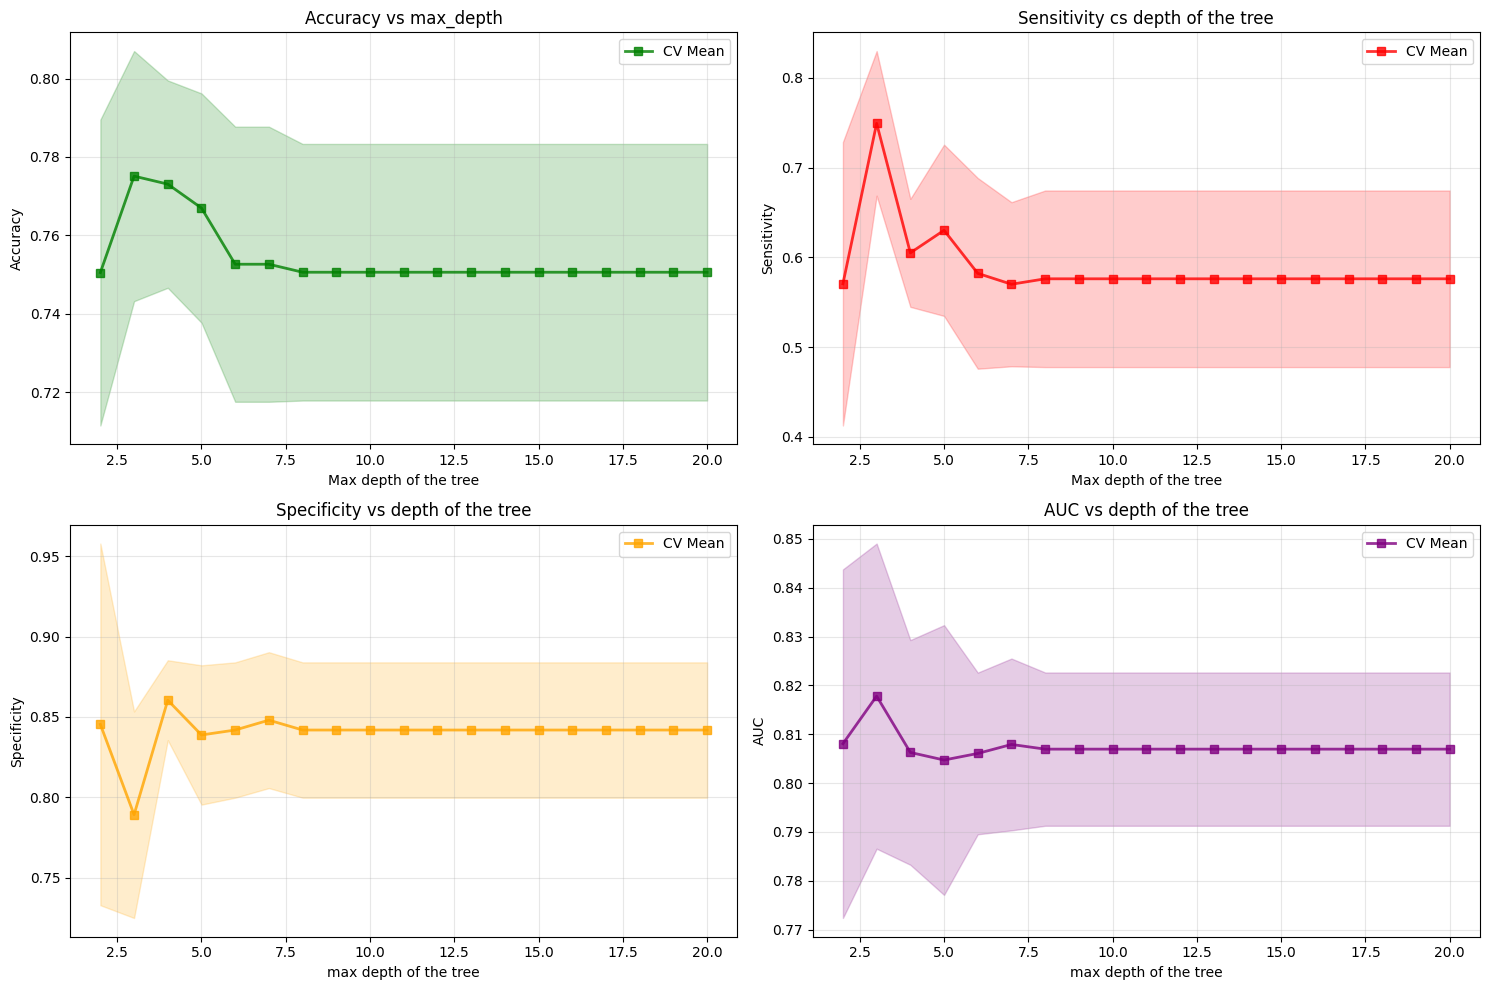

In [55]:
plot_depth_comparison_cv_only(results_df)

Selection of the appropriate decision tree based on sensitivity.

In [56]:
optimal_depth = results_df.loc[results_df['cv_sensitivity_mean'].idxmax(), 'max_depth']
optimal_sensitivity = results_df.loc[results_df['cv_sensitivity_mean'].idxmax(), 'cv_sensitivity_mean']

print(f"\n OPTYMALNA GŁĘBOKOŚĆ: {int(optimal_depth)}")
print(f"   Maksymalna czułość CV: {optimal_sensitivity:.4f}")

# Top 5 candidates
print("\n Top 5 candidates (based on sensivity CV):")
top5 = results_df.nlargest(5, 'cv_sensitivity_mean')[
    ['max_depth', 'cv_sensitivity_mean', 'cv_sensitivity_std', 
     'cv_specificity_mean', 'cv_accuracy_mean', 'cv_auc_mean', 'n_leaves']
]
print(top5.to_string(index=False))


 OPTYMALNA GŁĘBOKOŚĆ: 3
   Maksymalna czułość CV: 0.7492

 Top 5 candidates (based on sensivity CV):
 max_depth  cv_sensitivity_mean  cv_sensitivity_std  cv_specificity_mean  cv_accuracy_mean  cv_auc_mean  n_leaves
         3             0.749198            0.080518             0.789135          0.775110     0.817805         8
         5             0.630125            0.095341             0.838798          0.766968     0.804726        21
         4             0.604991            0.060128             0.860433          0.773070     0.806278        14
         6             0.582175            0.106192             0.841875          0.752640     0.806071        26
         8             0.576114            0.098310             0.841875          0.750600     0.806955        29


Training of the model - metryki dla depths = 3.

In [57]:
tree_optimal = DecisionTreeClassifier(
    max_depth=int(optimal_depth),
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
tree_optimal.fit(X_train, y_train)

print(f"\nStructure of the chosen tree:")
print(f"  - Depth: {tree_optimal.get_depth()}")
print(f"  - Number of leaves: {tree_optimal.get_n_leaves()}")
print(f"  - Number of nodes: {tree_optimal.tree_.node_count}")

#Mark on train set CV
train_opt, cv_opt = evaluate_model_train_only(
    tree_optimal, X_train, y_train, 
    f"Optimal tree (depth={int(optimal_depth)})"
)


Structure of the chosen tree:
  - Depth: 3
  - Number of leaves: 8
  - Number of nodes: 15

Optimal tree (depth=3)

Metric               Whole set       CV Mean         CV Std    
----------------------------------------------------------------------
Accuracy             0.8037          0.7751          0.0319    
Sensitivity (RECALL) 0.6647          0.7492          0.0805    
Specificity          0.8758          0.7891          0.0643    
Precision            0.7351          N/A             N/A       
F1-Score             0.6981          N/A             N/A       
AUC                  0.8594          0.8178          0.0312    


Structure of the tree

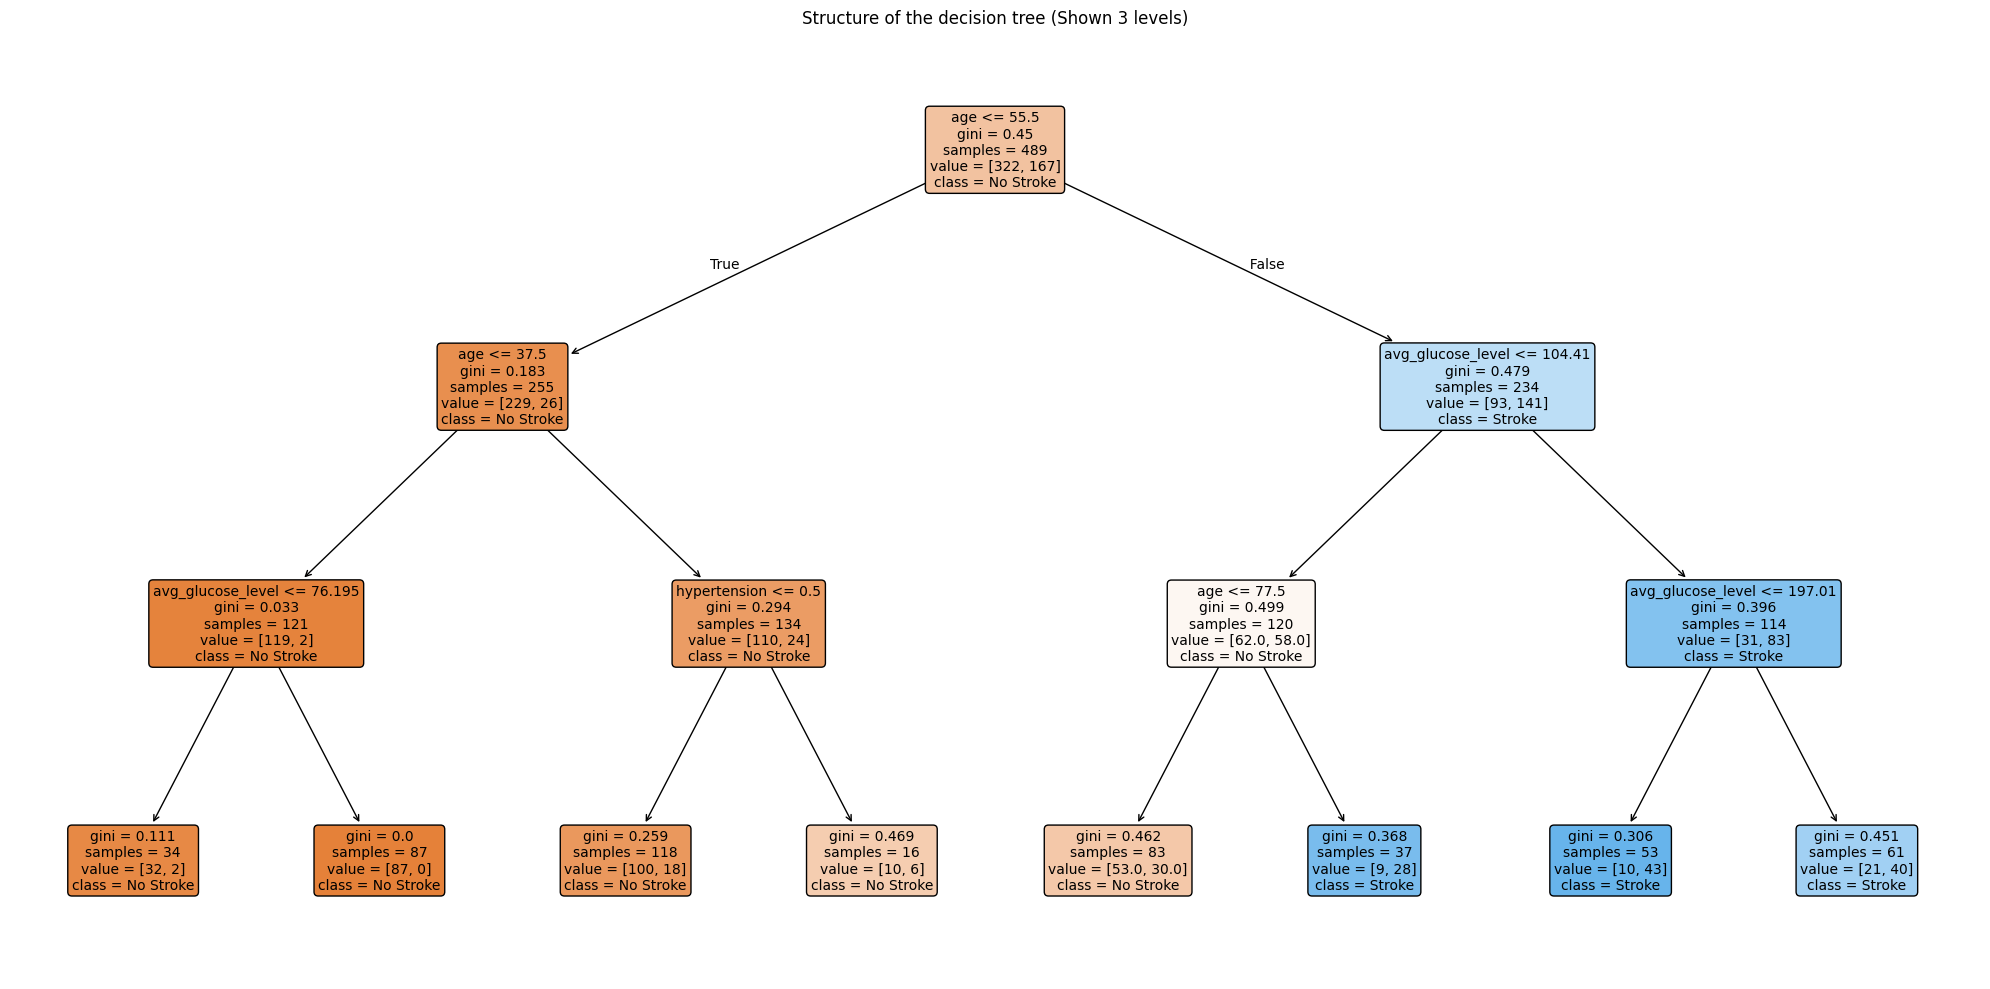

In [58]:
plot_tree_structure(tree_optimal, X_train, max_depth_to_show=min(int(optimal_depth), 4))

Split Conditions and Other Metrics

- **age ≤ 65.5** – split condition  
- **gini** – measure of node impurity  
  - `0` = perfectly pure  
  - `0.5` = 50/50 split  
- **samples** – number of samples in this node  
- **value = [950, 50]** – 950 without stroke, 50 with stroke  
- **class** – predicted class (majority)

**Color legend:**  
🟦 *Blue* = No Stroke  
🟧 *Orange* = Stroke

Importance of the features.

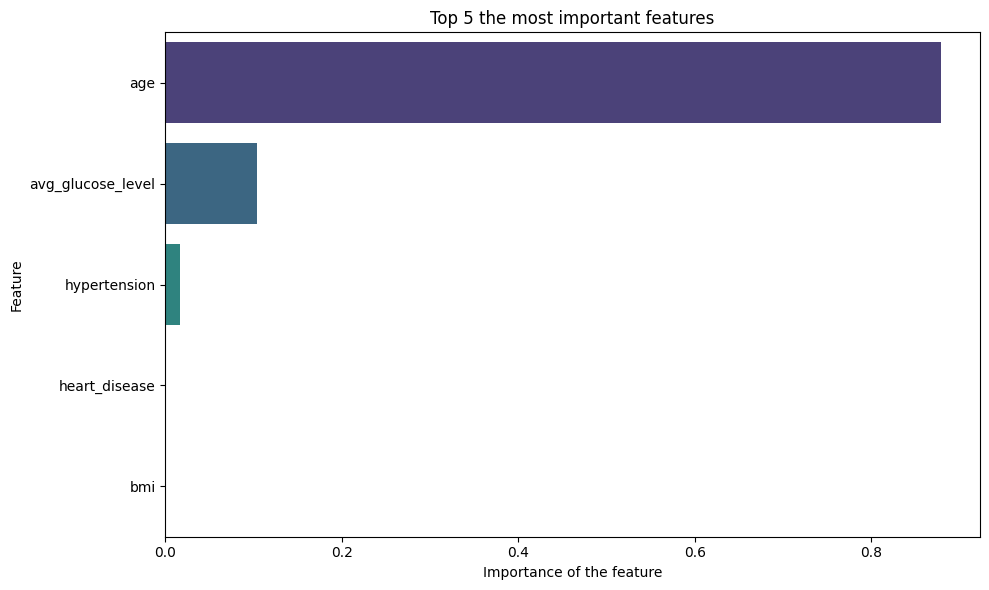


 Top 5 most important features:
          feature  importance
              age    0.879457
avg_glucose_level    0.103632
     hypertension    0.016912
    heart_disease    0.000000
              bmi    0.000000


In [59]:
importance_df = analyze_feature_importance(tree_optimal, X_train, top_n=5)

print("\n Top 5 most important features:")
print(importance_df.head(5).to_string(index=False))

It can be observed that, in fact, three features are the most important for this decision tree:  
- **age**,  
- **glucose level**,  
- **hypertension**.

## Test set evaluation


Drzewo optymalne (głębokość=3) - FINAL MARK OF TEST SET

Metric               Value          
----------------------------------------
Accuracy             0.7561         
Sensitivity          0.5714         
Specificity          0.8519         
Precision            0.6667         
F1                   0.6154         
Auc                  0.7975         


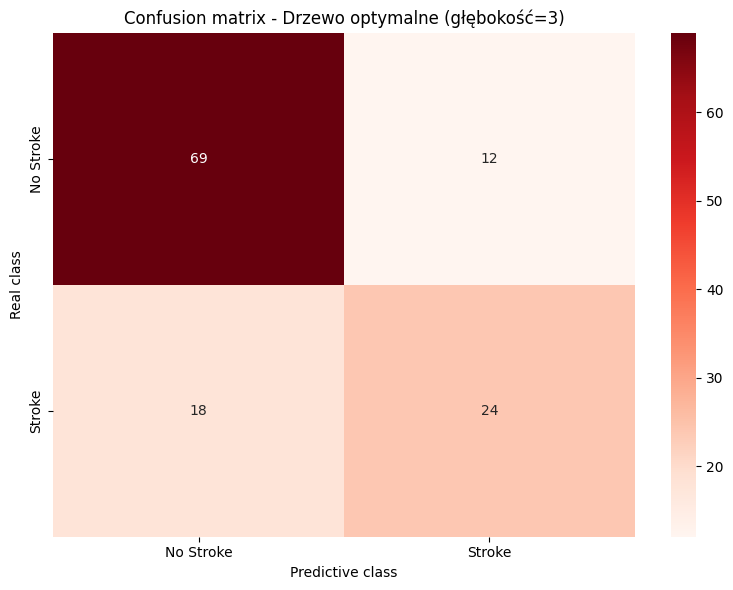


Detailed Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.79      0.85      0.82        81
      Stroke       0.67      0.57      0.62        42

    accuracy                           0.76       123
   macro avg       0.73      0.71      0.72       123
weighted avg       0.75      0.76      0.75       123



In [60]:
test_metrics, y_test_pred = evaluate_final_model(
    tree_optimal, X_test, y_test, 
    f"Drzewo optymalne (głębokość={int(optimal_depth)})"
)

In [61]:
cm_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm_test.ravel()

print(f" Confusion matrix - details:")
print(f"  True Negatives (TN):  {tn:4d}")
print(f"  False Positives (FP): {fp:4d}")
print(f"  False Negatives (FN): {fn:4d}")
print(f"  True Positives (TP):  {tp:4d}")

print(f"\n Results:")
print(f"  •  {test_metrics['sensitivity']*100:.1f}% strokes")
print(f"  • Missed {(1-test_metrics['sensitivity'])*100:.1f}% strokes")
print(f"  • {(1-test_metrics['specificity'])*100:.1f}% false alarms")

 Confusion matrix - details:
  True Negatives (TN):    69
  False Positives (FP):   12
  False Negatives (FN):   18
  True Positives (TP):    24

 Results:
  •  57.1% strokes
  • Missed 42.9% strokes
  • 14.8% false alarms


It can be observed that the model is overfitting on the test data – there is a difference of more than 10% in sensitivity.

## Random Forest & Boosting

In [62]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score, 
                             roc_curve)
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

#  cross-validation function
def evaluate_model_cv(model, X_train, y_train, model_name):
    """Ocena modelu na zbiorze treningowym używając cross-validation"""
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Cross-validation for sensitivity
    cv_sensitivity = cross_val_score(model, X_train, y_train, 
                                     cv=cv, scoring='recall', n_jobs=-1)
    
    # Cross-validation for other metrics
    cv_specificity = []
    cv_roc_auc = cross_val_score(model, X_train, y_train, 
                                  cv=cv, scoring='roc_auc', n_jobs=-1)
    
    # Calculation of specificity by cross-validation
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        cv_specificity.append(specificity)
    
    cv_specificity = np.array(cv_specificity)
    
    return {
        'model_name': model_name,
        'sensitivity_mean': cv_sensitivity.mean(),
        'sensitivity_std': cv_sensitivity.std(),
        'specificity_mean': cv_specificity.mean(),
        'specificity_std': cv_specificity.std(),
        'roc_auc_mean': cv_roc_auc.mean(),
        'roc_auc_std': cv_roc_auc.std()
    }

# Test set evaluation
def evaluate_model_test(model, X_train, X_test, y_train, y_test, model_name):
    # Training set
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculation of the metrics
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    
    print(f"\n{'='*70}")
    print(f"Results on test set: {model_name}")
    print(f"{'='*70}")
    
    print(f"\n*** METRICS ***")
    print(f"SENSITIVITY (Recall/TPR): {sensitivity:.4f}")
    print(f"SPECIFICITY (TNR):        {specificity:.4f}")
    print(f"ROC AUC:                  {roc_auc_score(y_test, y_pred_proba):.4f}")
    
    print(f"\n*** METRICS ***")
    print(f"Accuracy:                 {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision (PPV):          {precision_score(y_test, y_pred):.4f}")
    print(f"F1-Score:                 {f1_score(y_test, y_pred):.4f}")
    
    print(f"\n*** Confusion Matrix ***")
    print(f"                    Predicted")
    print(f"                    N  P")
    print(f"Real N    {tn:4d}      {fp:4d}")
    print(f"            P    {fn:4d}      {tp:4d}")
    

    
    total_strokes = tp + fn
    if total_strokes > 0:
        print(f"\nSpotted {tp}/{total_strokes} strokes ({sensitivity*100:.1f}%)")
        print(f"Missed {fn}/{total_strokes} strokes ({(fn/total_strokes)*100:.1f}%)")
    
    return {
        'model_name': model_name,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': sensitivity,
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'model': model
    }

### Random Forest

Train set - RF

In [63]:
results_rf_cv = []

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2', 0.5],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

print(f"\nTesting {len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_features']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['min_samples_split'])} combinations...")

best_rf_sensitivity = 0
best_rf_params = None

counter = 0
total = (len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_features']) * 
         len(param_grid_rf['max_depth']) * len(param_grid_rf['min_samples_split']))

for n_est in param_grid_rf['n_estimators']:
    for max_feat in param_grid_rf['max_features']:
        for max_d in param_grid_rf['max_depth']:
            for min_split in param_grid_rf['min_samples_split']:
                counter += 1
                
                rf = RandomForestClassifier(
                    n_estimators=n_est,
                    max_features=max_feat,
                    max_depth=max_d,
                    min_samples_split=min_split,
                    class_weight='balanced',
                    random_state=42,
                    n_jobs=-1
                )
                
                result = evaluate_model_cv(rf, X_train, y_train, 
                                          f"RF(n={n_est}, feat={max_feat}, depth={max_d}, split={min_split})")
                
                result['n_estimators'] = n_est
                result['max_features'] = max_feat
                result['max_depth'] = max_d
                result['min_samples_split'] = min_split
                results_rf_cv.append(result)
                
                # The best model
                if result['sensitivity_mean'] > best_rf_sensitivity:
                    best_rf_sensitivity = result['sensitivity_mean']
                    best_rf_params = {
                        'n_estimators': n_est,
                        'max_features': max_feat,
                        'max_depth': max_d,
                        'min_samples_split': min_split
                    }
                
                if counter % 10 == 0:
                    print(f"Postęp: {counter}/{total} ({counter/total*100:.1f}%)")

df_rf_cv = pd.DataFrame(results_rf_cv)

print(f"\n{'='*70}")
print("The best RANDOM FOREST (based on CV sensitivity)")
print(f"{'='*70}")
print(f"Parameters:")
for key, value in best_rf_params.items():
    print(f"  {key}: {value}")

best_rf_row = df_rf_cv.loc[df_rf_cv['sensitivity_mean'].idxmax()]
print(f"\nResults of (Cross-Validation):")
print(f"  Sensitivity: {best_rf_row['sensitivity_mean']:.4f} (±{best_rf_row['sensitivity_std']:.4f})")
print(f"  Specificity: {best_rf_row['specificity_mean']:.4f} (±{best_rf_row['specificity_std']:.4f})")
print(f"  ROC AUC:     {best_rf_row['roc_auc_mean']:.4f} (±{best_rf_row['roc_auc_std']:.4f})")


Testing 144 combinations...
Postęp: 10/144 (6.9%)
Postęp: 20/144 (13.9%)
Postęp: 30/144 (20.8%)
Postęp: 40/144 (27.8%)
Postęp: 50/144 (34.7%)
Postęp: 60/144 (41.7%)
Postęp: 70/144 (48.6%)
Postęp: 80/144 (55.6%)
Postęp: 90/144 (62.5%)
Postęp: 100/144 (69.4%)
Postęp: 110/144 (76.4%)
Postęp: 120/144 (83.3%)
Postęp: 130/144 (90.3%)
Postęp: 140/144 (97.2%)

The best RANDOM FOREST (based on CV sensitivity)
Parameters:
  n_estimators: 50
  max_features: sqrt
  max_depth: 5
  min_samples_split: 5

Results of (Cross-Validation):
  Sensitivity: 0.8319 (±0.0460)
  Specificity: 0.7703 (±0.0414)
  ROC AUC:     0.8258 (±0.0252)


#Boosting - train set

In [64]:
results_gb_cv = []


param_grid_gb = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.7, 0.8, 1.0]
}

print(f"\nTestowanie {len(param_grid_gb['n_estimators']) * len(param_grid_gb['learning_rate']) * len(param_grid_gb['max_depth']) * len(param_grid_gb['subsample'])} kombinacji...")

best_gb_sensitivity = 0
best_gb_params = None

counter = 0
total = (len(param_grid_gb['n_estimators']) * len(param_grid_gb['learning_rate']) * 
         len(param_grid_gb['max_depth']) * len(param_grid_gb['subsample']))

for n_est in param_grid_gb['n_estimators']:
    for lr in param_grid_gb['learning_rate']:
        for max_d in param_grid_gb['max_depth']:
            for subsample in param_grid_gb['subsample']:
                counter += 1
                
                gb = GradientBoostingClassifier(
                    n_estimators=n_est,
                    learning_rate=lr,
                    max_depth=max_d,
                    subsample=subsample,
                    random_state=42
                )
                
                result = evaluate_model_cv(gb, X_train, y_train, 
                                          f"GB(n={n_est}, lr={lr}, depth={max_d}, sub={subsample})")
                
                result['n_estimators'] = n_est
                result['learning_rate'] = lr
                result['max_depth'] = max_d
                result['subsample'] = subsample
                results_gb_cv.append(result)
                
                # The best model
                if result['sensitivity_mean'] > best_gb_sensitivity:
                    best_gb_sensitivity = result['sensitivity_mean']
                    best_gb_params = {
                        'n_estimators': n_est,
                        'learning_rate': lr,
                        'max_depth': max_d,
                        'subsample': subsample
                    }
                
                if counter % 10 == 0:
                    print(f"Progress: {counter}/{total} ({counter/total*100:.1f}%)")

df_gb_cv = pd.DataFrame(results_gb_cv)

print(f"\n{'='*70}")
print("The best GRADIENT BOOSTING (based on CV sensitivity)")
print(f"{'='*70}")
print(f"Parameters:")
for key, value in best_gb_params.items():
    print(f"  {key}: {value}")

best_gb_row = df_gb_cv.loc[df_gb_cv['sensitivity_mean'].idxmax()]
print(f"\nResults of (Cross-Validation):")
print(f"  Sensitivity: {best_gb_row['sensitivity_mean']:.4f} (±{best_gb_row['sensitivity_std']:.4f})")
print(f"  Specificity: {best_gb_row['specificity_mean']:.4f} (±{best_gb_row['specificity_std']:.4f})")
print(f"  ROC AUC:     {best_gb_row['roc_auc_mean']:.4f} (±{best_gb_row['roc_auc_std']:.4f})")


Testowanie 192 kombinacji...
Progress: 10/192 (5.2%)
Progress: 20/192 (10.4%)
Progress: 30/192 (15.6%)
Progress: 40/192 (20.8%)
Progress: 50/192 (26.0%)
Progress: 60/192 (31.2%)
Progress: 70/192 (36.5%)
Progress: 80/192 (41.7%)
Progress: 90/192 (46.9%)
Progress: 100/192 (52.1%)
Progress: 110/192 (57.3%)
Progress: 120/192 (62.5%)
Progress: 130/192 (67.7%)
Progress: 140/192 (72.9%)
Progress: 150/192 (78.1%)
Progress: 160/192 (83.3%)
Progress: 170/192 (88.5%)
Progress: 180/192 (93.8%)
Progress: 190/192 (99.0%)

The best GRADIENT BOOSTING (based on CV sensitivity)
Parameters:
  n_estimators: 50
  learning_rate: 0.05
  max_depth: 3
  subsample: 1.0

Results of (Cross-Validation):
  Sensitivity: 0.6886 (±0.0410)
  Specificity: 0.8478 (±0.0180)
  ROC AUC:     0.8420 (±0.0287)


Visualisation

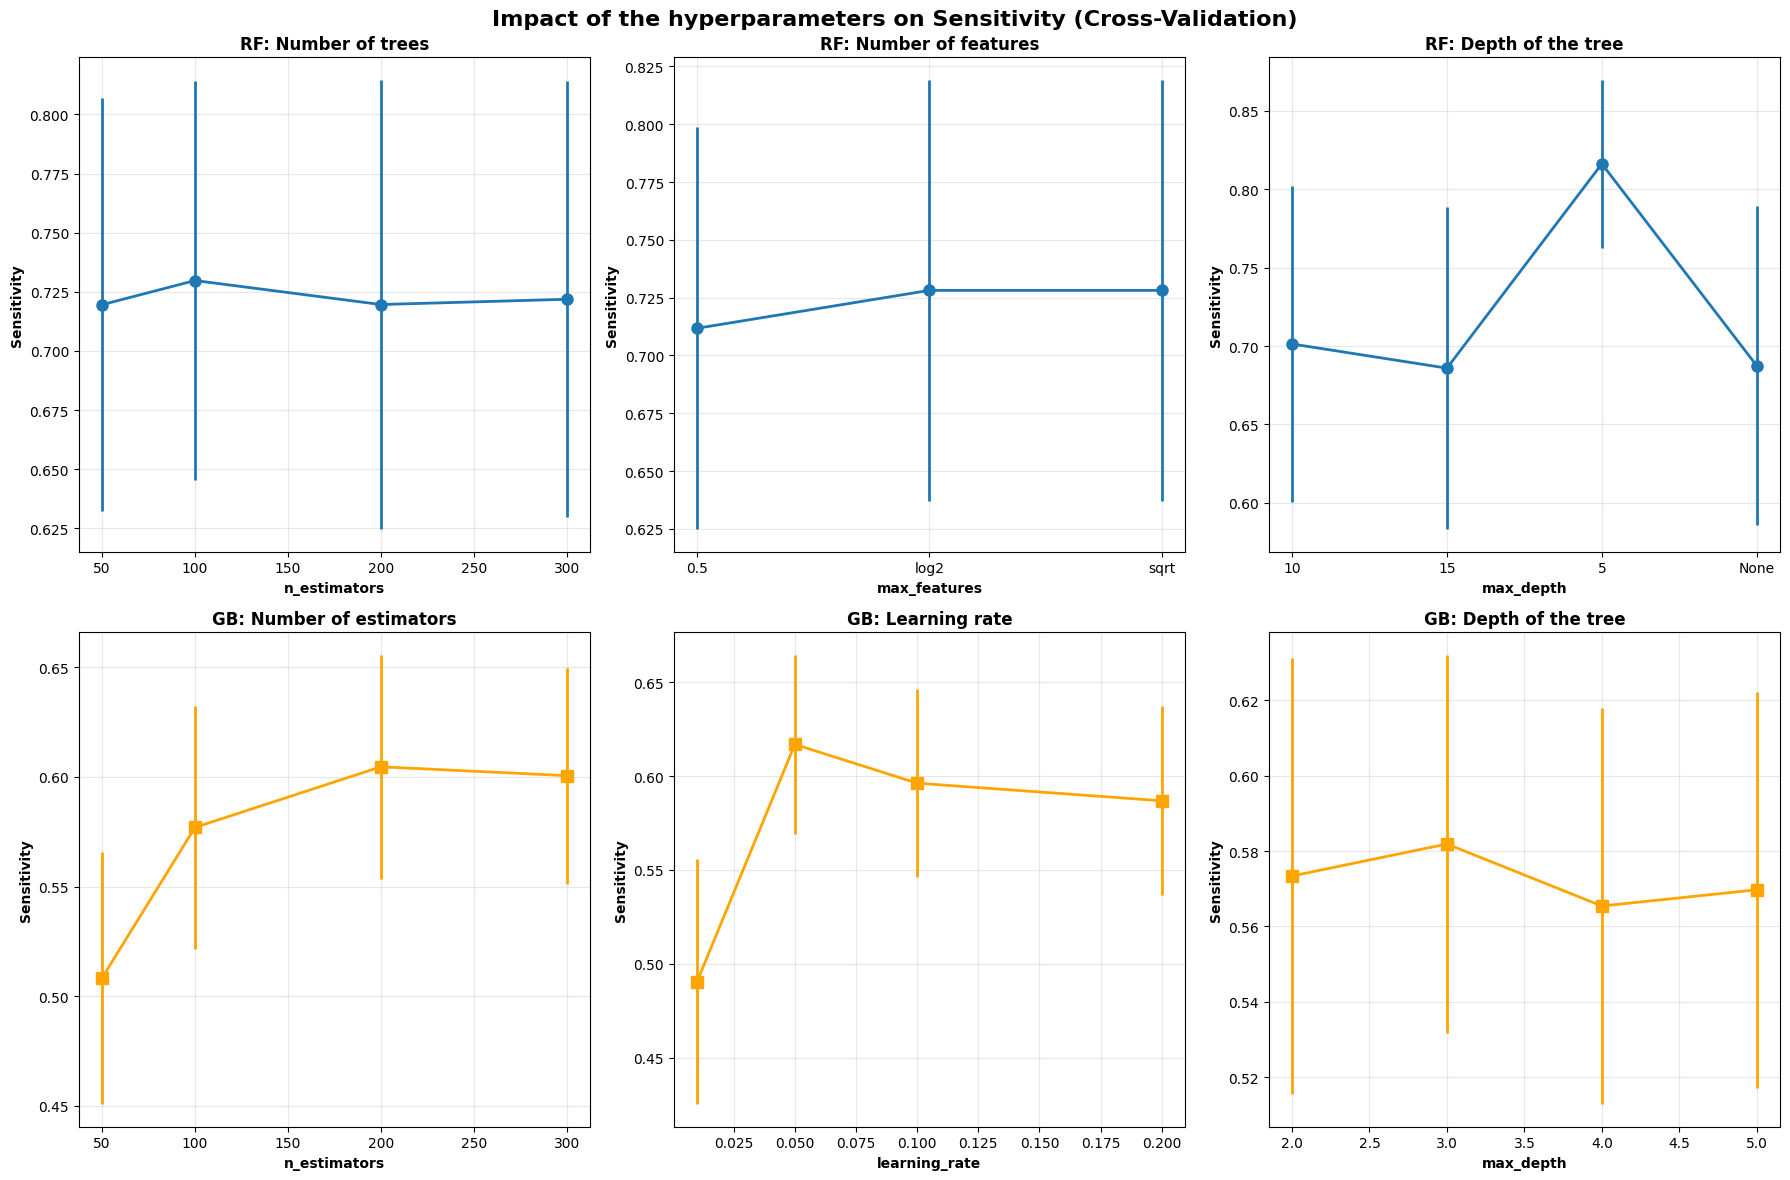

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Impact of the hyperparameters on Sensitivity (Cross-Validation)', 
             fontsize=16, fontweight='bold')

# Random Forest - n_estimators
ax = axes[0, 0]
rf_n_est = df_rf_cv.groupby('n_estimators').agg({
    'sensitivity_mean': 'mean',
    'sensitivity_std': 'mean'
}).reset_index()
ax.errorbar(rf_n_est['n_estimators'], rf_n_est['sensitivity_mean'], 
            yerr=rf_n_est['sensitivity_std'], marker='o', linewidth=2, markersize=8)
ax.set_xlabel('n_estimators', fontweight='bold')
ax.set_ylabel('Sensitivity', fontweight='bold')
ax.set_title('RF: Number of trees', fontweight='bold')
ax.grid(alpha=0.3)

# Random Forest - max_features
ax = axes[0, 1]
rf_max_feat = df_rf_cv.groupby('max_features').agg({
    'sensitivity_mean': 'mean',
    'sensitivity_std': 'mean'
}).reset_index()
ax.errorbar(range(len(rf_max_feat)), rf_max_feat['sensitivity_mean'], 
            yerr=rf_max_feat['sensitivity_std'], marker='o', linewidth=2, markersize=8)
ax.set_xticks(range(len(rf_max_feat)))
ax.set_xticklabels(rf_max_feat['max_features'])
ax.set_xlabel('max_features', fontweight='bold')
ax.set_ylabel('Sensitivity', fontweight='bold')
ax.set_title('RF: Number of features', fontweight='bold')
ax.grid(alpha=0.3)

# Random Forest - max_depth
ax = axes[0, 2]
rf_max_depth = df_rf_cv.copy()
rf_max_depth['max_depth_str'] = rf_max_depth['max_depth'].apply(
    lambda x: 'None' if pd.isna(x) else str(int(x)))
rf_max_depth_grouped = rf_max_depth.groupby('max_depth_str').agg({
    'sensitivity_mean': 'mean',
    'sensitivity_std': 'mean'
}).reset_index()
ax.errorbar(range(len(rf_max_depth_grouped)), rf_max_depth_grouped['sensitivity_mean'], 
            yerr=rf_max_depth_grouped['sensitivity_std'], marker='o', linewidth=2, markersize=8)
ax.set_xticks(range(len(rf_max_depth_grouped)))
ax.set_xticklabels(rf_max_depth_grouped['max_depth_str'])
ax.set_xlabel('max_depth', fontweight='bold')
ax.set_ylabel('Sensitivity', fontweight='bold')
ax.set_title('RF: Depth of the tree', fontweight='bold')
ax.grid(alpha=0.3)

# Gradient Boosting - n_estimators
ax = axes[1, 0]
gb_n_est = df_gb_cv.groupby('n_estimators').agg({
    'sensitivity_mean': 'mean',
    'sensitivity_std': 'mean'
}).reset_index()
ax.errorbar(gb_n_est['n_estimators'], gb_n_est['sensitivity_mean'], 
            yerr=gb_n_est['sensitivity_std'], marker='s', linewidth=2, markersize=8, color='orange')
ax.set_xlabel('n_estimators', fontweight='bold')
ax.set_ylabel('Sensitivity', fontweight='bold')
ax.set_title('GB: Number of estimators', fontweight='bold')
ax.grid(alpha=0.3)

# Gradient Boosting - learning_rate
ax = axes[1, 1]
gb_lr = df_gb_cv.groupby('learning_rate').agg({
    'sensitivity_mean': 'mean',
    'sensitivity_std': 'mean'
}).reset_index()
ax.errorbar(gb_lr['learning_rate'], gb_lr['sensitivity_mean'], 
            yerr=gb_lr['sensitivity_std'], marker='s', linewidth=2, markersize=8, color='orange')
ax.set_xlabel('learning_rate', fontweight='bold')
ax.set_ylabel('Sensitivity', fontweight='bold')
ax.set_title('GB: Learning rate', fontweight='bold')
ax.grid(alpha=0.3)

# Gradient Boosting - max_depth
ax = axes[1, 2]
gb_depth = df_gb_cv.groupby('max_depth').agg({
    'sensitivity_mean': 'mean',
    'sensitivity_std': 'mean'
}).reset_index()
ax.errorbar(gb_depth['max_depth'], gb_depth['sensitivity_mean'], 
            yerr=gb_depth['sensitivity_std'], marker='s', linewidth=2, markersize=8, color='orange')
ax.set_xlabel('max_depth', fontweight='bold')
ax.set_ylabel('Sensitivity', fontweight='bold')
ax.set_title('GB: Depth of the tree', fontweight='bold')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

It can be observed that, in the case of the Random Forest, the most noticeable changes in sensitivity occur for the **max_depth** hyperparameter.  
In contrast, for boosting, the **n_estimators** parameter seems to have the greatest impact.


### The best models

In [66]:
best_rf_model = RandomForestClassifier(
    **best_rf_params,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

best_gb_model = GradientBoostingClassifier(
    **best_gb_params,
    random_state=42
)

#Test set evaluation
rf_test_results = evaluate_model_test(best_rf_model, X_train, X_test, y_train, y_test,
                                      "Random Forest (optimal parameters)")

gb_test_results = evaluate_model_test(best_gb_model, X_train, X_test, y_train, y_test,
                                      "Gradient Boosting (optimal parameters)")


Results on test set: Random Forest (optimal parameters)

*** METRICS ***
SENSITIVITY (Recall/TPR): 0.7381
SPECIFICITY (TNR):        0.7037
ROC AUC:                  0.8169

*** METRICS ***
Accuracy:                 0.7154
Precision (PPV):          0.5636
F1-Score:                 0.6392

*** Confusion Matrix ***
                    Predicted
                    N  P
Real N      57        24
            P      11        31

Spotted 31/42 strokes (73.8%)
Missed 11/42 strokes (26.2%)

Results on test set: Gradient Boosting (optimal parameters)

*** METRICS ***
SENSITIVITY (Recall/TPR): 0.6429
SPECIFICITY (TNR):        0.7901
ROC AUC:                  0.8119

*** METRICS ***
Accuracy:                 0.7398
Precision (PPV):          0.6136
F1-Score:                 0.6279

*** Confusion Matrix ***
                    Predicted
                    N  P
Real N      64        17
            P      15        27

Spotted 27/42 strokes (64.3%)
Missed 15/42 strokes (35.7%)


#Comparison rf vs boosting

In [67]:
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Sensitivity': [rf_test_results['sensitivity'], gb_test_results['sensitivity']],
    'Specificity': [rf_test_results['specificity'], gb_test_results['specificity']],
    'Accuracy': [rf_test_results['accuracy'], gb_test_results['accuracy']],
    'Precision': [rf_test_results['precision'], gb_test_results['precision']],
    'F1-Score': [rf_test_results['f1'], gb_test_results['f1']],
    'ROC AUC': [rf_test_results['roc_auc'], gb_test_results['roc_auc']],
    'False Neg': [rf_test_results['fn'], gb_test_results['fn']],
    'True Pos': [rf_test_results['tp'], gb_test_results['tp']]
})

print("\n" + comparison_df.to_string(index=False))


            Model  Sensitivity  Specificity  Accuracy  Precision  F1-Score  ROC AUC  False Neg  True Pos
    Random Forest     0.738095     0.703704  0.715447   0.563636  0.639175 0.816872         11        31
Gradient Boosting     0.642857     0.790123  0.739837   0.613636  0.627907 0.811875         15        27


### Visual Comparison

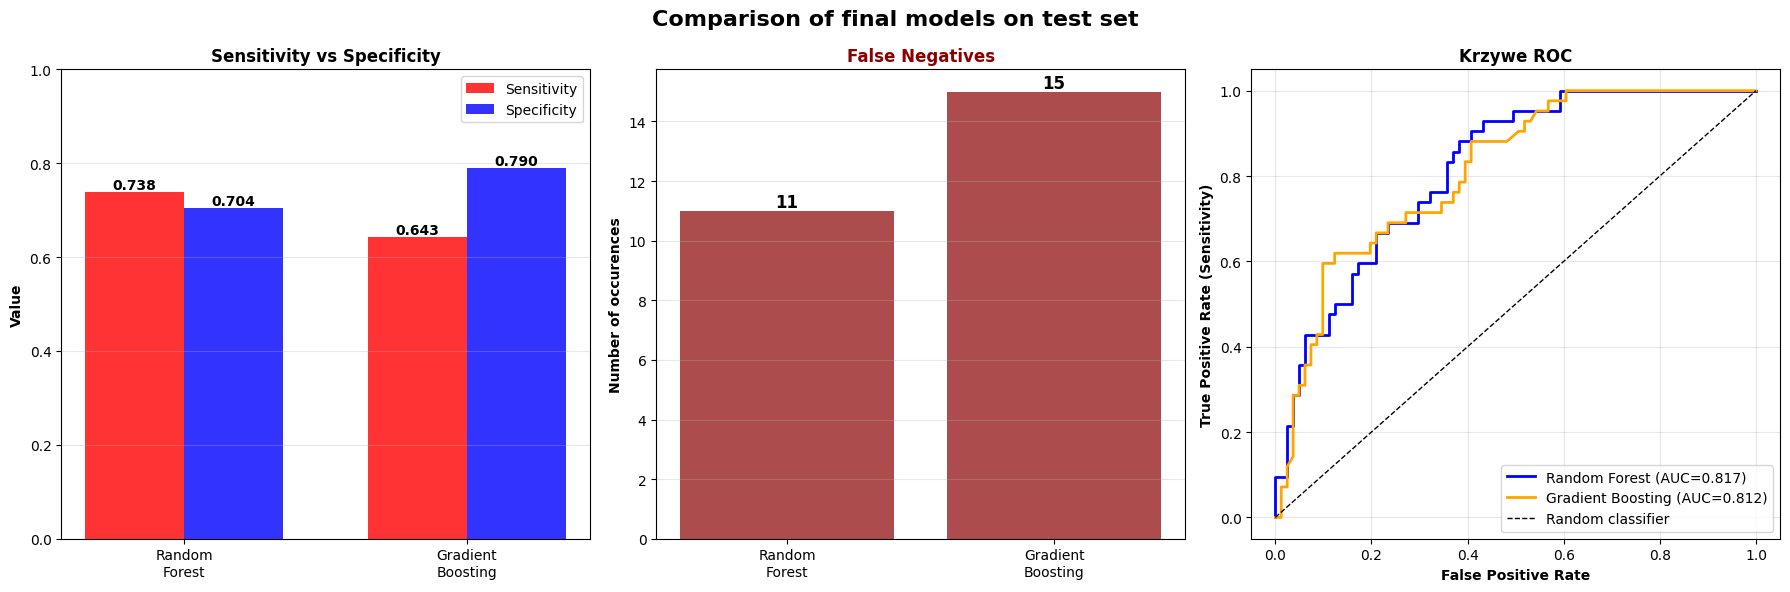

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparison of final models on test set', 
             fontsize=16, fontweight='bold')

# PLOT 1: Sensitivity vs Specificity
ax = axes[0]
models = ['Random\nForest', 'Gradient\nBoosting']
sensitivity_vals = [rf_test_results['sensitivity'], gb_test_results['sensitivity']]
specificity_vals = [rf_test_results['specificity'], gb_test_results['specificity']]

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, sensitivity_vals, width, label='Sensitivity', color='red', alpha=0.8)
bars2 = ax.bar(x + width/2, specificity_vals, width, label='Specificity', color='blue', alpha=0.8)

ax.set_ylabel('Value', fontweight='bold')
ax.set_title('Sensitivity vs Specificity', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# PLOT 2: False Negatives
ax = axes[1]
fn_vals = [rf_test_results['fn'], gb_test_results['fn']]
bars = ax.bar(models, fn_vals, color='darkred', alpha=0.7)
ax.set_ylabel('Number of occurences', fontweight='bold')
ax.set_title('False Negatives', fontweight='bold', color='darkred')
ax.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# PLOT 3: ROC Curves
ax = axes[2]
for result, name, color in [(rf_test_results, 'Random Forest', 'blue'),
                             (gb_test_results, 'Gradient Boosting', 'orange')]:
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    ax.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC={result["roc_auc"]:.3f})', color=color)

ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random classifier')
ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate (Sensitivity)', fontweight='bold')
ax.set_title('Krzywe ROC', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

The best-performing model, based on the sensitivity criterion and the previously established parameter settings, turned out to be the **Random Forest**.
